In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv('multipleChoiceResponses.csv',engine='python')
mkeys=data.keys()
#eliminamos las columnas con respuestas personales que no se pueden categorizar
data=data.drop([mkeys[2], mkeys[8], mkeys[10], mkeys[44], mkeys[56], mkeys[64], mkeys[83], mkeys[85], mkeys[87], mkeys[107], mkeys[109], mkeys[123],mkeys[125], mkeys[150], mkeys[194], mkeys[223], mkeys[249],mkeys[262], mkeys[264],mkeys[276], mkeys[304],mkeys[306], mkeys[329], mkeys[341], mkeys[371], mkeys[385], mkeys[394]],axis=1)
data.drop([data.index[0]],inplace=True)
mkeys=data.keys()

In [3]:
data=data.fillna(-1)
data.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q49_Part_11,Q49_Part_12,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8
1,710,Female,45-49,United States of America,Doctoral degree,Other,Consultant,Other,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,434,Male,30-34,Indonesia,Bachelorâ€™s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,"10-20,000",...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,718,Female,30-34,United States of America,Masterâ€™s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,"0-10,000",...,-1,-1,-1,Too time-consuming,-1,-1,-1,-1,-1,-1
4,621,Male,35-39,United States of America,Masterâ€™s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,-1,-1,...,-1,-1,-1,-1,Requires too much technical knowledge,-1,Not enough incentives to share my work,-1,-1,-1
5,731,Male,22-24,India,Masterâ€™s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,"0-10,000",...,-1,-1,-1,Too time-consuming,-1,-1,Not enough incentives to share my work,-1,-1,-1


In [4]:
males=data.loc[data['Q1']=='Male']
females=data.loc[data['Q1']=='Female']
other=data.loc[data['Q1']=='Prefer to self-describe']
males=males.drop([mkeys[1]],axis=1)
females=females.drop([mkeys[1]],axis=1)
other=other.drop([mkeys[1]],axis=1)
gkeys=other.keys() #llaves para los df de cada genero

We've divided the dataframe by gender, with the hopes of finding key differences between male and female kagglers, as well as individuals identifying themselves by a different gender to measure the differences between these demographics.

### Gender and country: is the secrecy of non-traditional genders related to social oppression?
Looking at the geographical distributions by gender we found that male indian kagglers outnumber americans, but overall USA has the top number of kagglers.

In [5]:
Co_m=males['Q3'].values
Co_m_n=males['Q3'].value_counts()

Co_f=females['Q3'].values
Co_f_n=females['Q3'].value_counts()

Co_o=other['Q3'].values
Co_o_n=other['Q3'].value_counts()

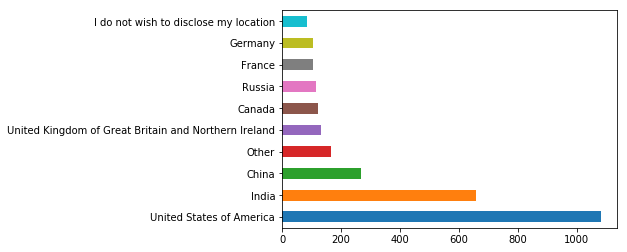

In [6]:
Co_f_n[:10].plot.barh(x='Female',legend=False)

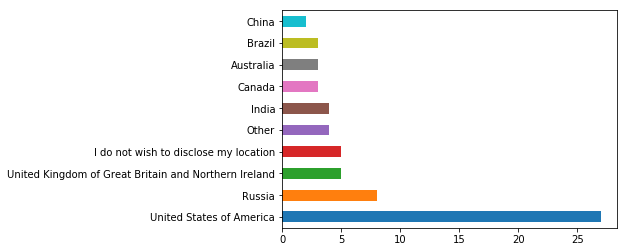

In [7]:
Co_o_n[:10].plot.barh()

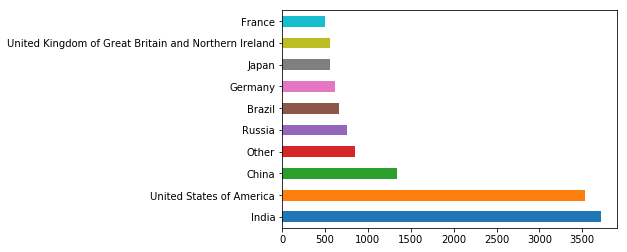

In [8]:
Co_m_n[:10].plot.barh()

We found that both females, and more strongly, people f a different gender identity feel a strong need to keep their nationality private, it is specially upsetting in the case of people of other gender identities to be so concerned about it. it is a worthy objective to further study how kagglers of non-traditional genders might feel oppressed even in this online, anonymous, survey

### Gender and studies

In [9]:
grouped_m=males.groupby(['Q3','Q4']).size()

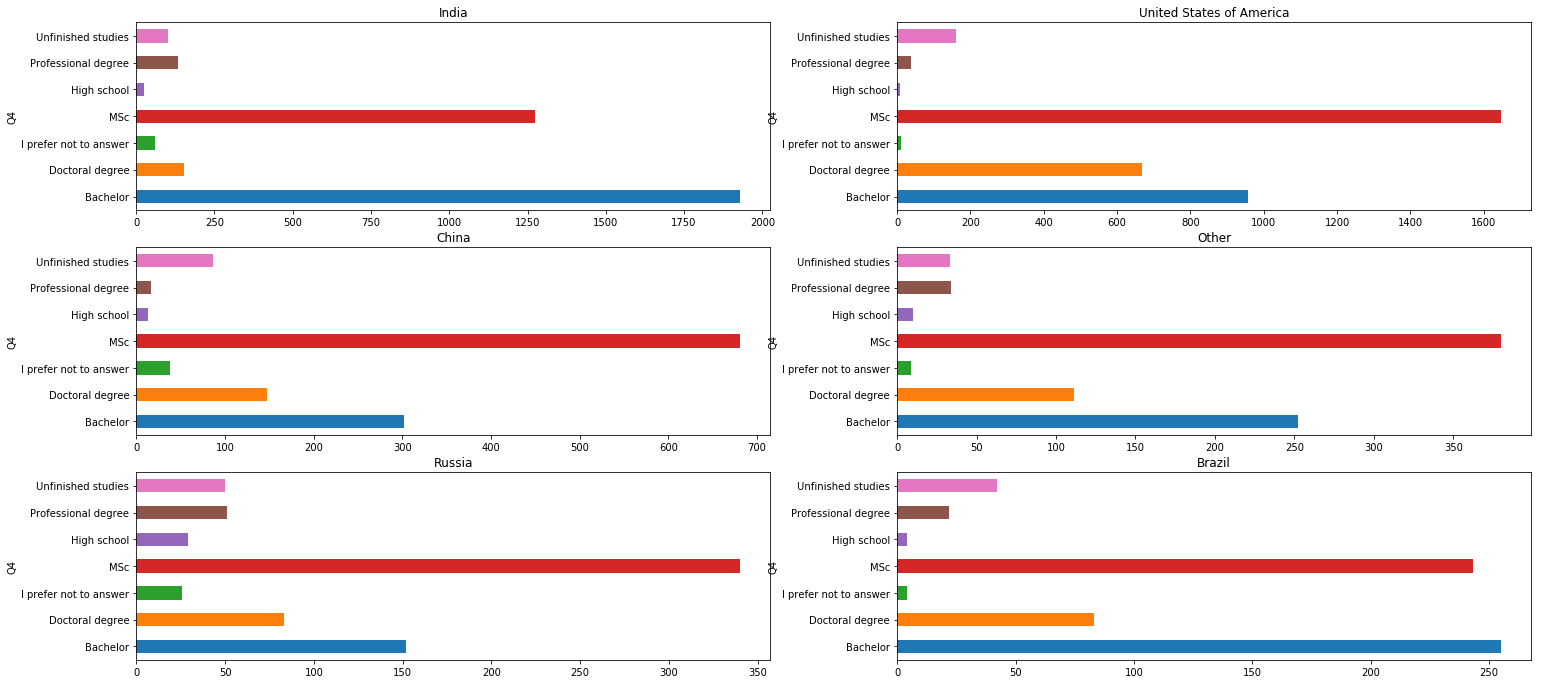

In [10]:
plt.figure(figsize=(25,20))
plt.subplot(5,2,1)
grouped_m=grouped_m.rename(index={'Some college/university study without earning a bachelorâ€™s degree': 'Unfinished studies'})
grouped_m=grouped_m.rename(index={'No formal education past high school': 'High school'})
grouped_m=grouped_m.rename(index={'Masterâ€™s degree': 'MSc'})
grouped_m=grouped_m.rename(index={'Bachelorâ€™s degree': 'Bachelor'})
plt.title('India')
grouped_m.loc['India'][1:].plot.barh()
plt.subplot(5,2,2)
plt.title('United States of America')
grouped_m.loc['United States of America'][1:].plot.barh()
plt.subplot(5,2,3)
plt.title('China')
grouped_m.loc['China'][1:].plot.barh()
plt.subplot(5,2,4)
plt.title('Other')
grouped_m.loc['Other'][1:].plot.barh()
plt.subplot(5,2,5)
plt.title('Russia')
grouped_m.loc['Russia'][1:].plot.barh()
plt.subplot(5,2,6)
plt.title('Brazil')
grouped_m.loc['Brazil'][1:].plot.barh()

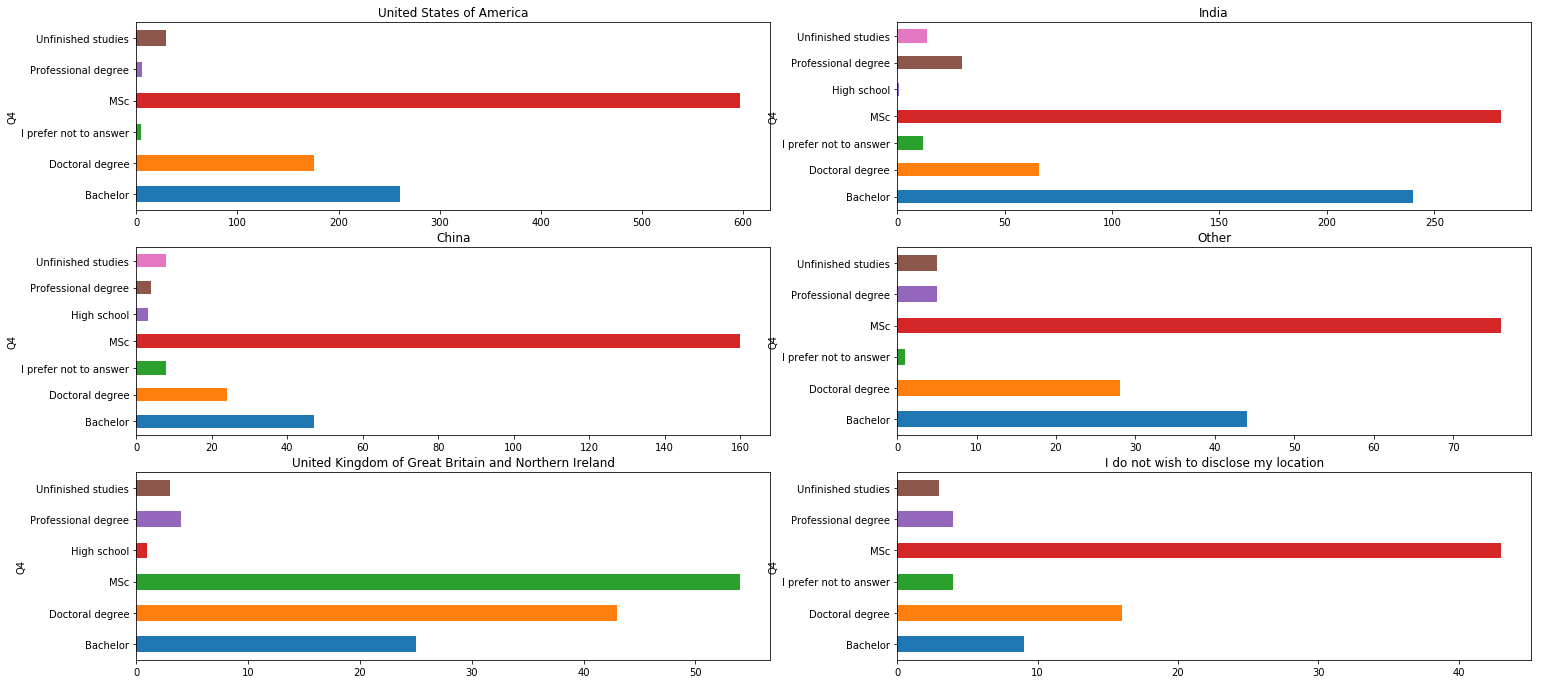

In [11]:
grouped_f=females.groupby(['Q3','Q4']).size()

plt.figure(figsize=(25,20))
grouped_f=grouped_f.rename(index={'Some college/university study without earning a bachelorâ€™s degree': 'Unfinished studies'})
grouped_f=grouped_f.rename(index={'No formal education past high school': 'High school'})
grouped_f=grouped_f.rename(index={'Masterâ€™s degree': 'MSc'})
grouped_f=grouped_f.rename(index={'Bachelorâ€™s degree': 'Bachelor'})

plt.subplot(5,2,1)
plt.title('United States of America')
grouped_f.loc['United States of America'][1:].plot.barh()
plt.subplot(5,2,2)
plt.title('India')
grouped_f.loc['India'][1:].plot.barh()
plt.subplot(5,2,3)
plt.title('China')
grouped_f.loc['China'][1:].plot.barh()
plt.subplot(5,2,4)
plt.title('Other')
grouped_f.loc['Other'][1:].plot.barh()
plt.subplot(5,2,5)
plt.title('United Kingdom of Great Britain and Northern Ireland')
grouped_f.loc['United Kingdom of Great Britain and Northern Ireland'][1:].plot.barh()
plt.subplot(5,2,6)
plt.title('I do not wish to disclose my location')
grouped_f.loc['I do not wish to disclose my location'][1:].plot.barh()

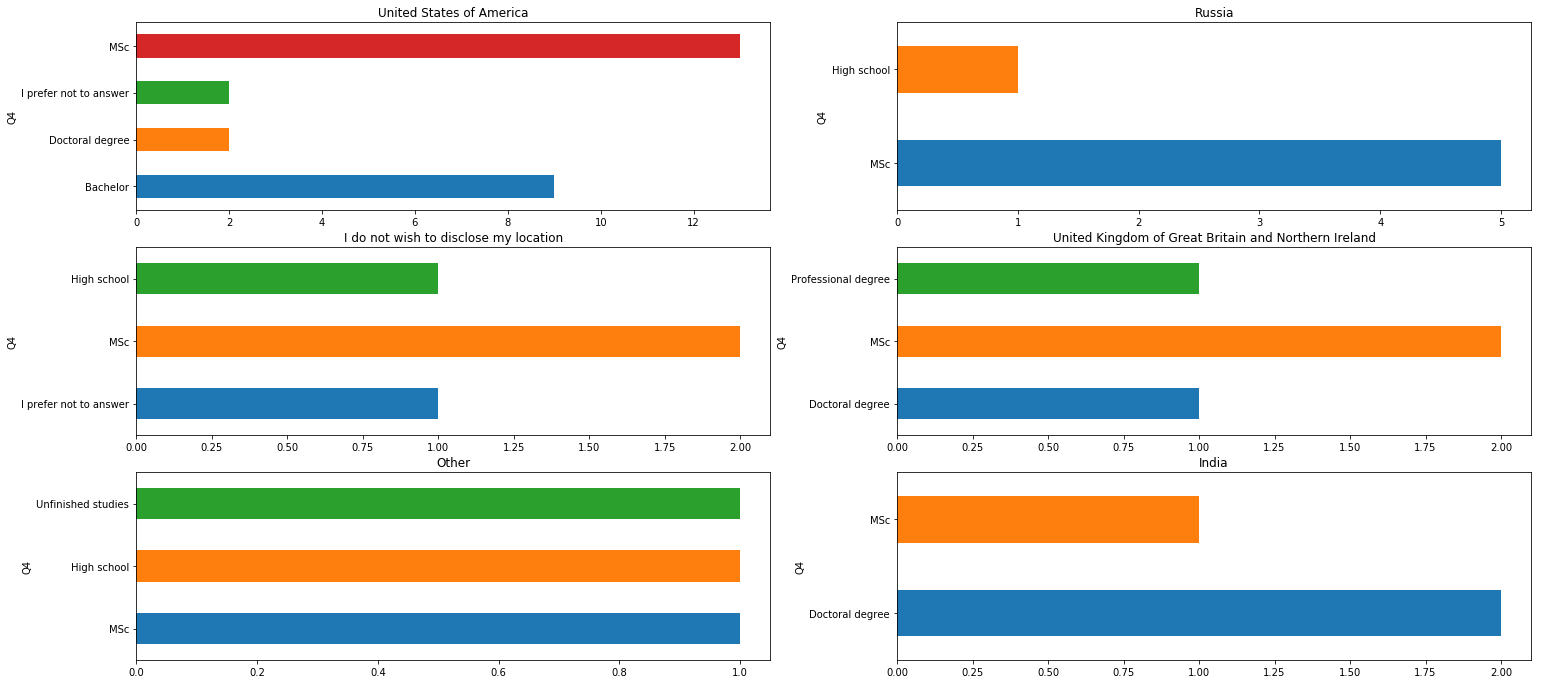

In [12]:
grouped_o=other.groupby(['Q3','Q4']).size()

plt.figure(figsize=(25,20))
grouped_o=grouped_o.rename(index={'Some college/university study without earning a bachelorâ€™s degree': 'Unfinished studies'})
grouped_o=grouped_o.rename(index={'No formal education past high school': 'High school'})
grouped_o=grouped_o.rename(index={'Masterâ€™s degree': 'MSc'})
grouped_o=grouped_o.rename(index={'Bachelorâ€™s degree': 'Bachelor'})

plt.subplot(5,2,1)
plt.title('United States of America')
grouped_o.loc['United States of America'][1:].plot.barh()
plt.subplot(5,2,2)
plt.title('Russia')
grouped_o.loc['Russia'][1:].plot.barh()
plt.subplot(5,2,3)
plt.title('I do not wish to disclose my location')
grouped_o.loc['I do not wish to disclose my location'][1:].plot.barh()

plt.subplot(5,2,4)
plt.title('United Kingdom of Great Britain and Northern Ireland')
grouped_o.loc['United Kingdom of Great Britain and Northern Ireland'][1:].plot.barh()
plt.subplot(5,2,5)
plt.title('Other')
grouped_o.loc['Other'][1:].plot.barh()
plt.subplot(5,2,6)
plt.title('India')
grouped_o.loc['India'][1:].plot.barh()

Unfortunately there are too few answers from kagglers self-identified as a non-binary gender, seeing how there's only contestants from the USA in the bachelor's degree category (but there's a considerable amount of Master's).

A fortunate finding was that women who prefered not to reveal their country of residence have been able to attain a higher-level education, seeing how there's more master and Ph.D recipients than Bachelors in this countries.

Lastly we can conclude that most kagglers in the survey are Master's degree recipients

## Codificar los datos para tenerlos en una estructura One-Hot

In [13]:
objetos=data.select_dtypes(include=['object']).copy()
objetos=objetos.drop(mkeys[0],axis=1)
objetos=pd.get_dummies(objetos)

In [14]:
enc_data=pd.concat([data.iloc[:,0],objetos,data.select_dtypes(exclude=['object']).copy()],axis=1)

In [15]:
mkeys=enc_data.keys()
col0=enc_data[[mkeys[0]]].values.astype(np.float)
mms=MinMaxScaler()
col_fit=mms.fit_transform(col0)
enc_data[mkeys[0]] = pd.DataFrame(col_fit).fillna(0)
enc_data.head()

,Time from Start to Finish (seconds),Q1_Female,Q1_Male,Q1_Prefer not to say,Q1_Prefer to self-describe,Q2_18-21,Q2_22-24,Q2_25-29,Q2_30-34,Q2_35-39,...,Q50_Part_5_-1,Q50_Part_5_Not enough incentives to share my work,Q50_Part_6_-1,Q50_Part_6_I had never considered making my work easier for others to reproduce,Q50_Part_7_-1,Q50_Part_7_None of these reasons apply to me,Q50_Part_8_-1,Q50_Part_8_Other,Q38_Part_19,Q38_Part_20
1,0.000472,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,-1,-1
2,0.000793,0,1,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,0,-1,-1
3,0.000683,1,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,0,-1,-1
4,0.000807,0,1,0,0,0,0,0,0,1,...,0,1,1,0,1,0,1,0,-1,-1
5,0.001271,0,1,0,0,0,1,0,0,0,...,0,1,1,0,1,0,1,0,-1,-1


In [16]:
pca=PCA(n_components=10)
enc_data[mkeys[0]] = enc_data[mkeys[0]].fillna(0)
pca.fit(enc_data)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
var_exp=0.0
i=0
var=pca.explained_variance_
var_s=sum(var)
sigma_arr=[]
while (var_exp<0.8):
    var_exp+=var[i]/var_s
    i+=1
print ('se llega al 80% de varianza con los primeros '+str(i)+' componentes')

se llega al 80% de varianza con los primeros 5 componentes


Hallar K Óptimo

In [18]:
pc_=pca.transform(enc_data)

In [19]:
Ks = range(1, 10)
km = [KMeans(n_clusters=i) for i in Ks]
score = [km[i].fit(pc_).score(pc_) for i in range(len(km))]
inertia=[km[i].inertia_ for i in range(len(km))]

Text(0,0.5,'Within-cluster variation')

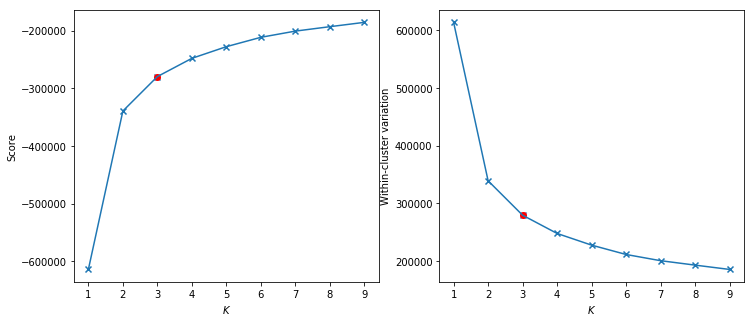

In [20]:
fig1, ax=plt.subplots(1,2, figsize=(12,5))
ax[0].scatter(Ks,score,marker='x')
ax[0].plot(Ks,score)
ax[0].scatter(Ks[2],score[2],color='r',marker='o')
ax[0].set_xlabel('$K$')
ax[0].set_ylabel('Score')

ax[1].scatter(Ks,inertia,marker='x')
ax[1].plot(Ks,inertia)
ax[1].scatter(Ks[2],inertia[2],color='r',marker='o')
ax[1].set_xlabel('$K$')
ax[1].set_ylabel('Within-cluster variation')

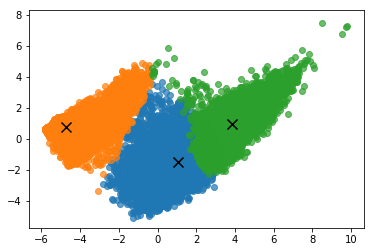

In [21]:
K_opt=km[2] #el Kmeans optimo
cluster_i=K_opt.fit_predict(pc_) #indices de los clusters
for i in range(0,3):
    plt.scatter(np.asarray(pc_)[cluster_i == i, 0], np.asarray(pc_)[cluster_i == i,1], alpha=0.7)

plt.scatter(K_opt.cluster_centers_[:,0], K_opt.cluster_centers_[:,1],marker='x',s=100,c='black')#centroides